In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("../cleaned_data.csv")

In [49]:
df.head()

,title,min_order,company,min_price,max_price,rating,num_ratings
0,"IC.INTEGRATED CIRCUITS, MICROCONTROLLERS.ELECT...",5.0,"Shenzhen Yukeda Electronics Co., Ltd.",0.03,0.10,5.0,54.0
1,Factory Price All in One PC 23.8 Inch Core I3 ...,2.0,"Shenzhen Manwei Brother Technology Co., Limited",85.00,129.00,4.9,26.0
2,JERTECH HG01 Wholesale Electronic Product Wire...,1.0,"Guangzhou Shanglong Electronic Technology Co.,...",3.60,5.88,5.0,2.0
3,MysteryBox Electronics Surprise Explosion Smar...,1.0,"Shenzhen Cyber Blue Electronic Co., Ltd.",8.54,8.54,4.1,189.0
4,Electronics 3c Lucky New Festival Gift High Qu...,1.0,"Shenzhen Saiborui Technology Co., Ltd.",4.00,4.90,4.5,88.0


In [50]:
df.isnull().sum()

title          0
min_order      0
company        0
min_price      0
max_price      0
rating         0
num_ratings    0
dtype: int64

In [51]:
df["company"].value_counts()

company
Shenzhen Yukeda Electronics Co., Ltd.                    30
Shenzhen Hainayu Electronics Co., Ltd.                   21
Shenzhen Xintailai Electronics Co., Ltd.                 10
Shenzhen Winsome Electronic Technology Co., Ltd.         10
Shenzhen Cyber Blue Electronic Co., Ltd.                  7
                                                         ..
Dongguan Pengji Electronics Co., Ltd.                     1
Dongguan Win Win Tech. Ltd.                               1
Shenzhen Ruiletong Technology Co., Ltd.                   1
Shenzhen Huashanweihai Electronics Co., Ltd.              1
Dongguan Pengyuan Optoelectronic Technology Co., Ltd.     1
Name: count, Length: 265, dtype: int64

In [52]:
# Most expensive product 
max(df["max_price"])

13300.0

In [53]:
min(df["max_price"])

0.01

In [54]:
max(df["min_price"])

12825.0

In [55]:
min(df["min_price"])

0.003

In [5]:
df.describe()

,min_order,min_price,max_price,rating,num_ratings
count,477.000000,477.000000,477.000000,477.000000,477.000000
mean,40.968553,70.910015,75.417849,4.702516,59.874214
std,116.549756,773.965735,790.900188,0.319128,104.441074
min,1.000000,0.003000,0.010000,3.000000,1.000000
25%,1.000000,1.000000,1.390000,4.600000,7.000000
50%,2.000000,4.790000,5.200000,4.800000,24.000000
75%,10.000000,10.300000,12.400000,4.900000,54.000000
max,999.000000,12825.000000,13300.000000,5.000000,842.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477 entries, 0 to 476
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        477 non-null    object 
 1   min_order    477 non-null    float64
 2   company      477 non-null    object 
 3   min_price    477 non-null    float64
 4   max_price    477 non-null    float64
 5   rating       477 non-null    float64
 6   num_ratings  477 non-null    float64
dtypes: float64(5), object(2)
memory usage: 26.2+ KB


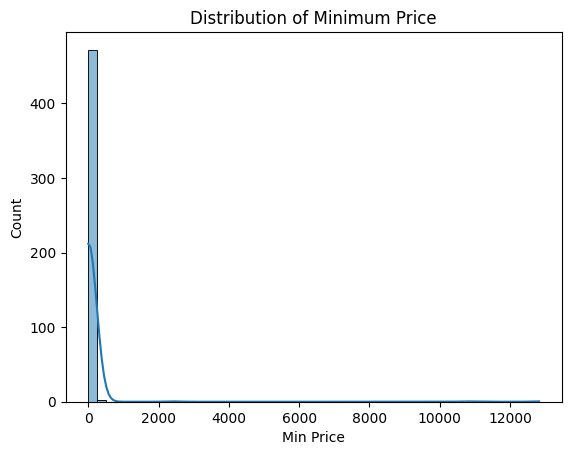

In [10]:
sns.histplot(df["min_price"],bins=50,kde=True)
plt.title("Distribution of Minimum Price")
plt.xlabel("Min Price")
plt.ylabel("Count")
plt.show()

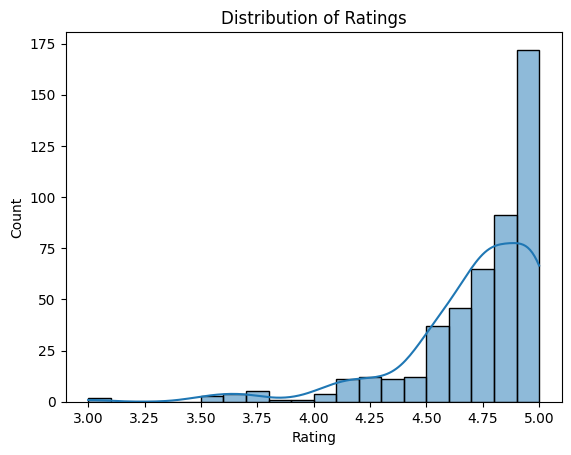

In [11]:
sns.histplot(df["rating"],bins=20,kde=True)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

C:\Users\ZAID\AppData\Local\Temp\ipykernel_9180\697192244.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_companies.values,y=top_companies.index,palette="viridis")


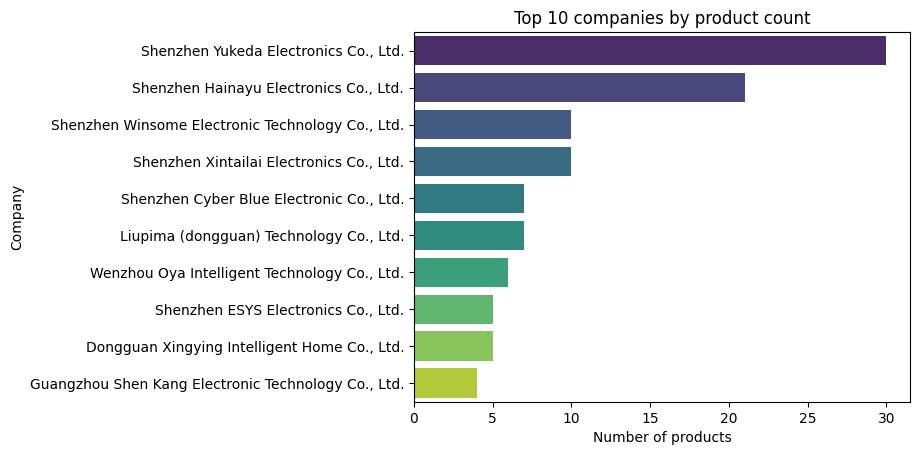

In [12]:
top_companies=df["company"].value_counts().head(10)
sns.barplot(x=top_companies.values,y=top_companies.index,palette="viridis")
plt.title("Top 10 companies by product count")
plt.xlabel("Number of products")
plt.ylabel("Company")
plt.show()

C:\Users\ZAID\AppData\Local\Temp\ipykernel_9180\1588237560.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_company.values,y=avg_rating_by_company.index,palette="magma")


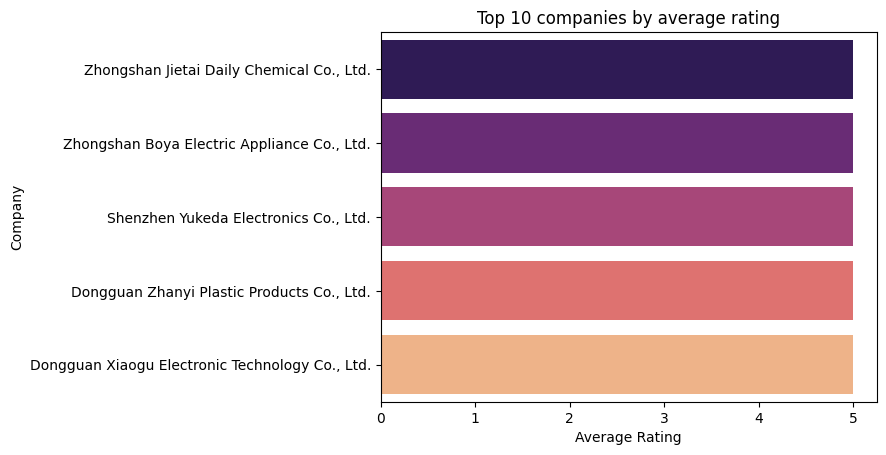

In [14]:
avg_rating_by_company=df.groupby('company')['rating'].mean().sort_values(ascending=False).head()
sns.barplot(x=avg_rating_by_company.values,y=avg_rating_by_company.index,palette="magma")
plt.title("Top 10 companies by average rating")
plt.xlabel("Average Rating")
plt.ylabel("Company")
plt.show()

C:\Users\ZAID\AppData\Local\Temp\ipykernel_9180\42420768.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rated_products["num_ratings"],y=top_rated_products["title"],palette="cubehelix")


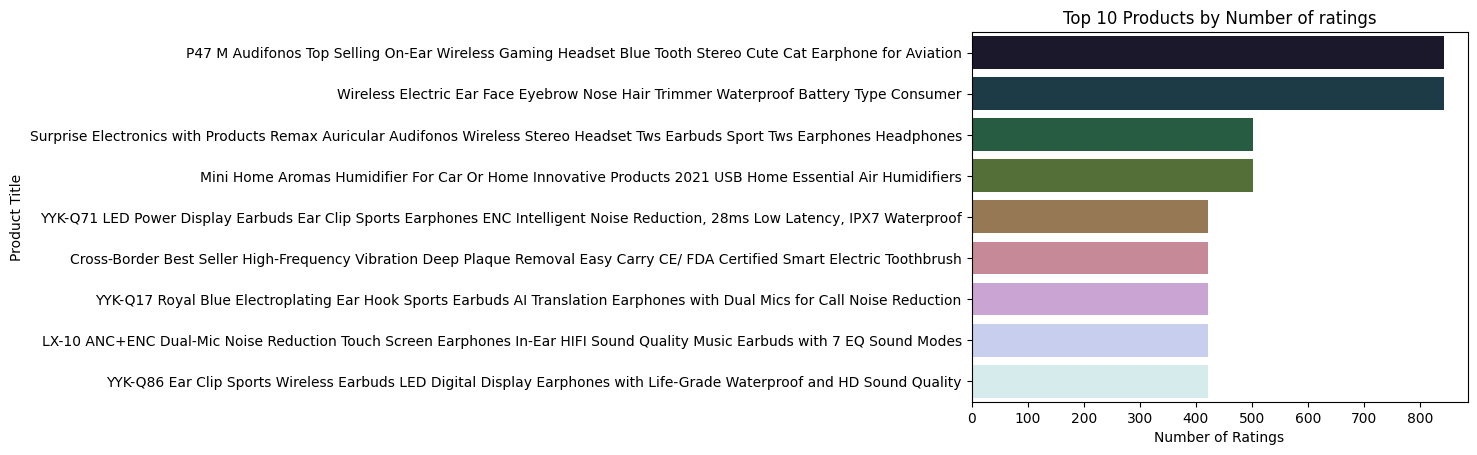

In [16]:
top_rated_products=df.sort_values("num_ratings",ascending=False).head(10)
sns.barplot(x=top_rated_products["num_ratings"],y=top_rated_products["title"],palette="cubehelix")
plt.title("Top 10 Products by Number of ratings")
plt.xlabel("Number of Ratings")
plt.ylabel("Product Title")
plt.show()

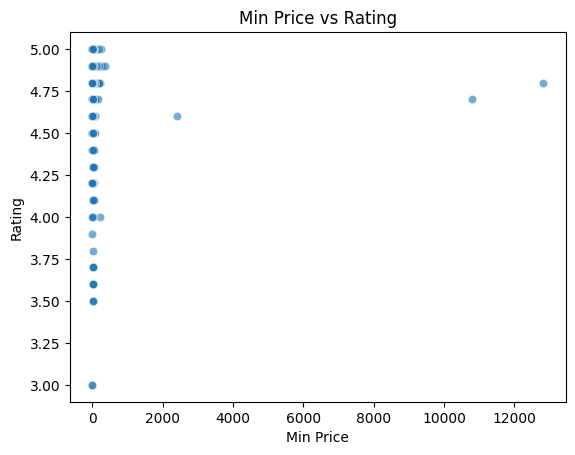

In [17]:
sns.scatterplot(data=df,x="min_price",y="rating",alpha=0.6)
plt.title("Min Price vs Rating")
plt.xlabel("Min Price")
plt.ylabel("Rating")
plt.show()

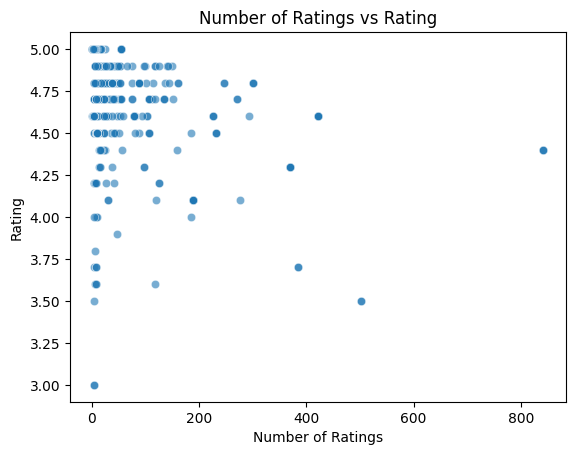

In [18]:
sns.scatterplot(data=df,x="num_ratings",y="rating",alpha=0.6)
plt.title("Number of Ratings vs Rating")
plt.xlabel("Number of Ratings")
plt.ylabel("Rating")
plt.show()

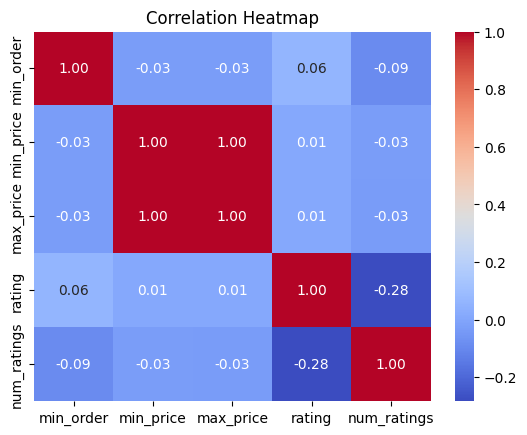

In [19]:
correlation = df[["min_order", "min_price", "max_price", "rating", "num_ratings"]].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()